In [178]:
import pandas as pd
traf = pd.read_csv('Forbes-Project.csv')
TMC = pd.read_csv('TMC_Identification_REVISED.csv')


In [179]:
traf.head()

,tmc_code,measurement_tstamp,speed,average_speed,reference_speed,travel_time_minutes,confidence_score,cvalue
0,104+09114,2017-01-01 05:00:00,20.0,20.0,19.0,1.33,20.0,NaN
1,104+09114,2017-01-01 05:05:00,20.0,20.0,19.0,1.33,20.0,NaN
2,104+09114,2017-01-01 05:10:00,20.0,20.0,19.0,1.33,20.0,NaN
3,104+09114,2017-01-01 05:15:00,20.0,20.0,19.0,1.33,20.0,NaN
4,104+09114,2017-01-01 05:20:00,20.0,20.0,19.0,1.33,20.0,NaN


In [180]:
traf = traf.loc[traf.confidence_score >= 30 , :]
forbes= TMC.loc[TMC.road == 'FORBES AVE',:]
EST1 = forbes.loc[forbes.direction == 'EASTBOUND',:]
WST1 = forbes.loc[forbes.direction == 'WESTBOUND',:]

In [181]:
traf.rename(columns={'tmc_code':'tmc'}, inplace = True)
traf.rename(columns={'measurement_tstamp':'Date'}, inplace=True)

In [182]:
main1 = pd.merge(EST1,traf,on= 'tmc', how = 'inner')
main2 = pd.merge(WST1,traf,on= 'tmc', how = 'inner')

In [183]:
import datetime as dt
main1['Date'] = pd.to_datetime(main1['Date'])
main2['Date'] = pd.to_datetime(main2['Date'])

In [184]:
main1['hour'] = main1['Date'].dt.hour 
main2['hour'] = main2['Date'].dt.hour 

In [185]:
import datetime
t1= pd.to_datetime('1-20-2017')
t1a = pd.to_datetime('3-1-2017')
t2= pd.to_datetime('5-15-2017')
t3= pd.to_datetime('9-1-2017')
t4= pd.to_datetime('11-20-2017')
t5 = pd.to_datetime('11-27-2017')
t5a = pd.to_datetime('11-30-2017')
t6 = pd.to_datetime('12-20-2017')
t7 = pd.to_datetime('1-20-2018')
t7a = pd.to_datetime('3-1-2018')
t8 = pd.to_datetime('5-15-2018')
t9 = pd.to_datetime('9-1-2018')
t10 = pd.to_datetime('11-20-2018')
t11 = pd.to_datetime('11-27-2018')
t11a = pd.to_datetime('11-30-2018')
t12 = pd.to_datetime('12-20-2018')
t13 = pd.to_datetime('1-20-2019')
t13a = pd.to_datetime('3-1-2019')
t14 = pd.to_datetime('5-15-2019')


In [186]:
winter1 = main1[main1['Date'].between(t1,t1a)]
spring1 = main1[main1["Date"].between(t1a,t2)]
summer1 = main1[main1["Date"].between(t2,t3)]
fall1 = main1[main1["Date"].between(t3,t4)]
fall1a = main1[main1["Date"].between(t5,t5a)]
winter2 = main1[main1["Date"].between(t5a,t6)]
winter2a = main1[main1['Date'].between(t7,t7a)]
spring2 = main1[main1["Date"].between(t7a,t8)]
summer2 = main1[main1["Date"].between(t8,t9)]
fall2 = main1[main1["Date"].between(t9,t10)]
fall2a = main1[main1["Date"].between(t11,t11a)]
winter3 = main1[main1["Date"].between(t11a,t12)]
winter3a = main1[main1['Date'].between(t13,t13a)]
spring3 = main1[main1["Date"].between(t13,t14)]

In [187]:
spring2 = spring2.append(spring3)
spring1 = spring1.append(spring2)
winter2 = winter2.append(winter2a)
winter3 = winter3.append(winter3a)
winter1 = winter1.append(winter2)
winter1 = winter1.append(winter3)
summer1= summer1.append(summer2)
fall1 = fall1.append(fall1a)
fall2 = fall2.append(fall2a)
fall1=fall1.append(fall2)

In [188]:
spring1.head()

,tmc,road,direction,intersection,state,county,zip,start_latitude,start_longitude,end_latitude,...,start,end,Date,speed,average_speed,reference_speed,travel_time_minutes,confidence_score,cvalue,hour
7626,104+09116,FORBES AVE,EASTBOUND,BEELER ST,PA,ALLEGHENY,15213.0,40.44392,-79.95073,40.44389,...,Beeler,S_Bellefield,2017-03-01 05:00:00,21.0,25.0,21.0,1.83,30.0,100.0,5
7627,104+09116,FORBES AVE,EASTBOUND,BEELER ST,PA,ALLEGHENY,15213.0,40.44392,-79.95073,40.44389,...,Beeler,S_Bellefield,2017-03-01 05:05:00,21.0,25.0,21.0,1.83,30.0,100.0,5
7628,104+09116,FORBES AVE,EASTBOUND,BEELER ST,PA,ALLEGHENY,15213.0,40.44392,-79.95073,40.44389,...,Beeler,S_Bellefield,2017-03-01 05:10:00,21.0,25.0,21.0,1.83,30.0,100.0,5
7629,104+09116,FORBES AVE,EASTBOUND,BEELER ST,PA,ALLEGHENY,15213.0,40.44392,-79.95073,40.44389,...,Beeler,S_Bellefield,2017-03-01 06:40:00,22.0,25.0,21.0,1.74,30.0,100.0,6
7630,104+09116,FORBES AVE,EASTBOUND,BEELER ST,PA,ALLEGHENY,15213.0,40.44392,-79.95073,40.44389,...,Beeler,S_Bellefield,2017-03-01 06:45:00,22.0,25.0,21.0,1.74,30.0,100.0,6


In [190]:
a=fall1['speed'].mean()
b=summer1['speed'].mean()
c =winter1['speed'].mean()
d =spring1['speed'].mean()
print(a)
print(b)
print(c)
print(d)

16.183981866886732
17.37666826511428
16.771310822835506
17.098448299487533


In [172]:
avg1 = spring1.groupby('hour').speed.mean()
avg2 = summer1.groupby('hour').speed.mean()
avg3= fall1.groupby('hour').speed.mean()
avg4 = winter1.groupby('hour').speed.mean()


Text(0,0.5,'Speed')

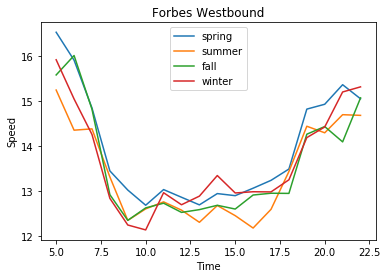

In [173]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(avg1, label = 'spring' )
plt.plot(avg2,label = 'summer')
plt.plot(avg3,label='fall')
plt.plot(avg4,label='winter')
plt.title('Forbes Westbound')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Speed')

## import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(avg1a, label = 'spring' )
plt.plot(avg2a,label = 'summer')
plt.plot(avg3a,label='fall2017')
plt.plot(avg4a,label='winter')
plt.plot(avg3b,label='fall2018')

plt.title('Forbes Westbound:Morning Traffic')
plt.legend()
plt.xlabel('Time')
plt.ylabel('Speed')